<a href="https://colab.research.google.com/github/huseynovnebi/Autism_Prediction/blob/main/Autism_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [6]:
df = pd.read_csv('/content/project_autism_data.csv')
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [7]:
df.shape

(704, 21)

In [8]:
df['age_desc'].value_counts()

,count
age_desc,
18 and more,704


In [9]:
df.drop('age_desc', axis=1, inplace=True)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,?,NO


In [10]:
df['contry_of_res'].value_counts()

,count
contry_of_res,
United States,113
United Arab Emirates,82
New Zealand,81
India,81
United Kingdom,77
...,...
China,1
Chile,1
Lebanon,1


In [11]:
df.drop('contry_of_res', axis=1, inplace=True)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,no,2.0,?,NO


In [13]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,233
Asian,123
?,95
Middle Eastern,92
Black,43
South Asian,36
Others,30
Latino,20
Hispanic,13


In [14]:
df.drop('ethnicity', axis=1, inplace=True)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,no,2.0,?,NO


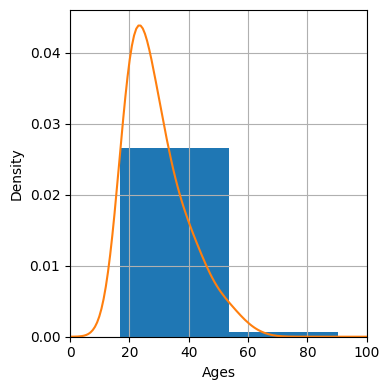

In [18]:
ax = df["age"].plot.hist(figsize=(4,4),xlim=[0, 100],density = True)
df["age"].plot.density(ax=ax)
ax.set_xlabel('Ages')

plt.tight_layout()
plt.grid(True)
plt.show()

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


In [21]:
df[df['age'] > 90]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,383.0,f,no,no,no,1.0,Self,NO


In [22]:
df = df[df["age"] <= 100]
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,no,2.0,?,NO


In [23]:
df['used_app_before'].value_counts()

,count
used_app_before,
no,689
yes,12


In [24]:
df.drop('used_app_before', axis=1, inplace=True)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,2.0,?,NO


In [25]:
df['relation'].value_counts()

,count
relation,
Self,521
?,93
Parent,50
Relative,28
Others,5
Health care professional,4


In [26]:
df.drop('relation', axis=1, inplace=True)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6.0,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5.0,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8.0,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6.0,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,2.0,NO


<Axes: >

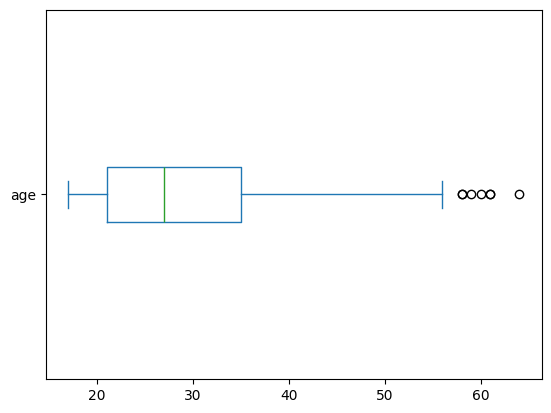

In [29]:
df['age'].plot.box(vert = False)

In [30]:
df[df['age'] > 56]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
7,1,1,1,1,0,0,0,0,1,0,64.0,m,no,no,5.0,NO
71,0,0,1,1,0,0,0,1,0,0,58.0,m,no,no,3.0,NO
203,1,1,1,1,1,1,1,0,1,1,60.0,f,no,yes,9.0,YES
309,1,1,1,1,1,1,0,1,0,0,58.0,f,no,no,7.0,YES
431,1,1,1,1,1,1,1,1,1,1,61.0,m,yes,yes,10.0,YES
448,1,1,1,1,1,1,1,0,1,1,59.0,m,no,no,9.0,YES
495,1,0,1,1,0,0,0,0,0,0,61.0,f,no,no,3.0,NO


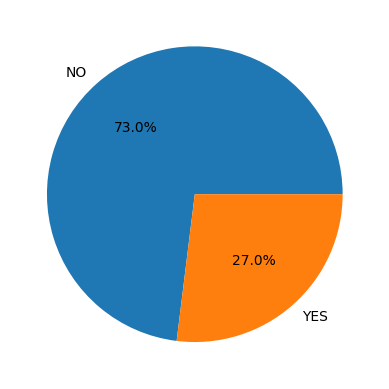

In [32]:
plt.pie(df['Class/ASD'].value_counts(), labels=df['Class/ASD'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [35]:
df["gender"] = df["gender"].map({"m": 1, "f": 0})
df["jundice"] = df["jundice"].map({"yes": 1, "no": 0})
df["austim"] = df["austim"].map({"yes": 1, "no": 0})
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,6.0,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,5.0,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,8.0,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,6.0,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,2.0,NO


In [36]:
df["Class/ASD"] = df["Class/ASD"].map({"YES": 1, "NO": 0})
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,6.0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,5.0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,8.0,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,6.0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,2.0,0


In [37]:
x = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.23,random_state=42,shuffle=True)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((539, 15), (539,), (162, 15), (162,))

In [82]:
clf = RandomForestClassifier(n_estimators=5,class_weight="balanced",max_depth=5, random_state=42)
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)
y_pred_train = clf.predict(x_train)



In [83]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_tr = accuracy_score(y_train, y_pred_train)
print('-----Train-----')
print(f"Accuracy: {accuracy_tr:.4f}")
print("Classification Report:\n", classification_report(y_train, y_pred_train))

print('-----Test-----')
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

-----Train-----
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       141

    accuracy                           1.00       539
   macro avg       1.00      1.00      1.00       539
weighted avg       1.00      1.00      1.00       539

-----Test-----
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        48

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



In [80]:
clf.feature_importances_

array([0.00000000e+00, 2.60122954e-02, 1.46439738e-02, 6.10962488e-02,
       2.45234090e-02, 9.47865381e-02, 4.15832204e-02, 3.34846747e-16,
       9.15265336e-02, 4.21640447e-02, 7.07700847e-03, 2.73035142e-04,
       9.72739289e-17, 2.65541841e-03, 5.93658274e-01])

In [84]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,6.0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,5.0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,8.0,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,6.0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,2.0,0
